### Import Libries

In [3]:
pip install yellowbrick

                                              0.0/282.6 kB ? eta -:--:--
     ---------                               71.7/282.6 kB 1.3 MB/s eta 0:00:01
     -----------------------                174.1/282.6 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\suman\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import pylab 
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PowerTransformer

### Data Input

In [5]:
# Import Data
df = pd.read_excel('data v2.xlsx')

In [6]:
# Raw Data
df.head()

,search_terms,wk 1,wk 2,wk 3,wk 4,wk 5,wk 6,wk 7,wk 8,wk 9,...,wk 53,wk 54,wk 55,wk 56,wk 57,wk 58,wk 59,wk 60,wk 61,wk 62
0,$1 gift cards,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,$2 gift cards,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,$5 gift cards,2914.0,7470.0,NaN,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,$5 gift cards,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,kindle,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0


In [7]:
df.iloc[:, 1:53]

,wk 1,wk 2,wk 3,wk 4,wk 5,wk 6,wk 7,wk 8,wk 9,wk 10,...,wk 43,wk 44,wk 45,wk 46,wk 47,wk 48,wk 49,wk 50,wk 51,wk 52
0,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,65689.0,27310.0,28338.0,26669.0,43789.0,24282.0,53120.0,40401.0,31224.0,57982.0
1,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,22970.0,11753.0,18398.0,14626.0,16863.0,17231.0,15723.0,13696.0,12411.0,16156.0
2,2914.0,7470.0,NaN,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,12820.0,...,4708.0,4674.0,4548.0,4386.0,4743.0,5379.0,6069.0,5402.0,6422.0,6444.0
3,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,218670.0,...,1223526.0,207662.0,144686.0,126712.0,126905.0,131232.0,126687.0,119196.0,138916.0,109153.0
4,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,11534.0,...,8776.0,5497.0,7344.0,6591.0,6244.0,6495.0,6428.0,4725.0,4626.0,6037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,11512.0,8245.0,12914.0,9970.0,12310.0,10472.0,10598.0,14704.0,20510.0,19010.0,...,2628.0,1974.0,3433.0,5554.0,5500.0,5548.0,4730.0,3601.0,4565.0,5297.0
15786,17760.0,17916.0,19246.0,29612.0,13052.0,12334.0,17690.0,11806.0,41632.0,40318.0,...,9356.0,NaN,7341.0,8585.0,8315.0,10648.0,8671.0,7774.0,7428.0,9050.0
15787,4562.0,4597.0,5007.0,13070.0,13518.0,8152.0,8538.0,10700.0,15074.0,5568.0,...,7478.0,NaN,3794.0,4335.0,4476.0,4903.0,4075.0,3715.0,3825.0,4539.0
15788,7652.0,13750.0,12949.0,14832.0,13820.0,10902.0,8427.0,16394.0,15428.0,14223.0,...,9302.0,7960.0,11350.0,10880.0,10732.0,10248.0,9096.0,14410.0,12062.0,12887.0


In [8]:
# We need 1-53 column for clustering
X = df.iloc[:, 1:53]
X.head()

,wk 1,wk 2,wk 3,wk 4,wk 5,wk 6,wk 7,wk 8,wk 9,wk 10,...,wk 43,wk 44,wk 45,wk 46,wk 47,wk 48,wk 49,wk 50,wk 51,wk 52
0,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,65689.0,27310.0,28338.0,26669.0,43789.0,24282.0,53120.0,40401.0,31224.0,57982.0
1,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,22970.0,11753.0,18398.0,14626.0,16863.0,17231.0,15723.0,13696.0,12411.0,16156.0
2,2914.0,7470.0,NaN,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,12820.0,...,4708.0,4674.0,4548.0,4386.0,4743.0,5379.0,6069.0,5402.0,6422.0,6444.0
3,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,218670.0,...,1223526.0,207662.0,144686.0,126712.0,126905.0,131232.0,126687.0,119196.0,138916.0,109153.0
4,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,11534.0,...,8776.0,5497.0,7344.0,6591.0,6244.0,6495.0,6428.0,4725.0,4626.0,6037.0


In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
imputer.fit(X)
X = pd.DataFrame(imputer.transform(X))

In [10]:
# Features od data
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
count,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,...,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04,1.579000e+04
mean,2.287564e+04,2.391550e+04,2.206165e+04,2.192128e+04,2.081059e+04,2.109806e+04,2.010250e+04,2.155740e+04,2.298320e+04,2.308108e+04,...,2.065855e+04,1.133259e+04,1.542998e+04,1.523428e+04,1.564781e+04,1.570446e+04,1.581249e+04,1.504786e+04,1.458172e+04,1.631278e+04
std,1.633575e+05,1.371044e+05,1.329365e+05,1.262436e+05,1.122415e+05,1.053948e+05,1.012093e+05,1.018623e+05,1.091803e+05,1.165856e+05,...,1.636935e+05,7.830426e+04,1.049690e+05,9.938110e+04,9.840068e+04,9.212859e+04,8.579071e+04,8.276000e+04,8.786302e+04,1.028647e+05
min,1.015000e+03,1.001000e+03,1.007000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.001000e+03,1.017000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.003000e+03,1.002000e+03,1.022000e+03,1.000000e+03,1.015000e+03,1.003000e+03,1.004000e+03,1.002000e+03
25%,3.870000e+03,4.148000e+03,3.866500e+03,3.880000e+03,3.547000e+03,3.514500e+03,3.556000e+03,3.850000e+03,4.222000e+03,4.246250e+03,...,2.592000e+03,1.824000e+03,2.441250e+03,2.502000e+03,2.588250e+03,2.622000e+03,2.653000e+03,2.551250e+03,2.447000e+03,2.669000e+03
50%,7.038000e+03,7.720500e+03,7.147000e+03,7.003000e+03,6.517000e+03,6.493500e+03,6.476000e+03,7.106500e+03,7.712000e+03,7.809000e+03,...,4.759500e+03,3.256000e+03,4.458000e+03,4.490000e+03,4.652000e+03,4.755500e+03,4.792000e+03,4.588000e+03,4.390500e+03,4.816500e+03
75%,1.579825e+04,1.761875e+04,1.595550e+04,1.600900e+04,1.480450e+04,1.472350e+04,1.467150e+04,1.624875e+04,1.770100e+04,1.748150e+04,...,1.156575e+04,7.385000e+03,1.025150e+04,1.024475e+04,1.060175e+04,1.076625e+04,1.086675e+04,1.035000e+04,9.988500e+03,1.093075e+04
max,1.789560e+07,1.465311e+07,1.404064e+07,1.321484e+07,1.036792e+07,8.160982e+06,8.375837e+06,9.714862e+06,9.984489e+06,9.501899e+06,...,1.240540e+07,7.904737e+06,1.118985e+07,1.049915e+07,1.001913e+07,9.299068e+06,8.402451e+06,8.066519e+06,8.900554e+06,1.021338e+07


### Feature Scaling and Transformation

In [11]:
# Feature Scaling
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))
scaled_X.columns = X.columns

# Data Visualization
#_ = sns.pairplot(scaled_X.iloc[:,0:3])

In [12]:
scaled_X.iloc[:, 0]

0        0.305918
1       -0.090655
2       -0.122200
3        0.708263
4       -0.083449
           ...   
15785   -0.069565
15786   -0.031317
15787   -0.112111
15788   -0.093195
15789   -0.067863
Name: 0, Length: 15790, dtype: float64

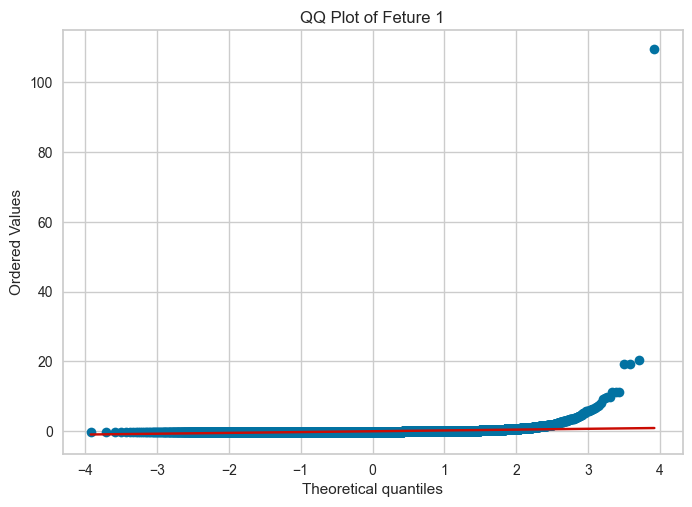

In [13]:
# QQ Plot - Scaled Data
stats.probplot(scaled_X.iloc[:,0], dist="norm", plot=pylab)
plt.title('QQ Plot of Feture 1')
pylab.show()

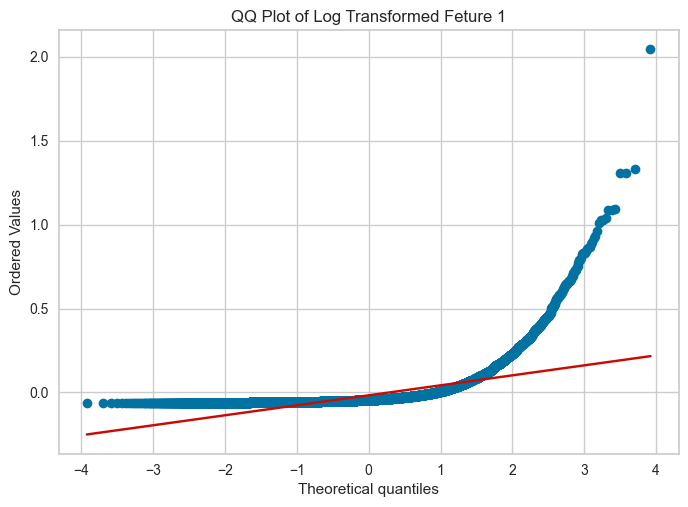

In [14]:
# Log Transformation
X_LogTransformed = np.log10(scaled_X + 1)

# QQ Plot - Log Transformed Data
stats.probplot(X_LogTransformed.iloc[:,0], dist="norm", plot=pylab)
plt.title('QQ Plot of Log Transformed Feture 1')
pylab.show()

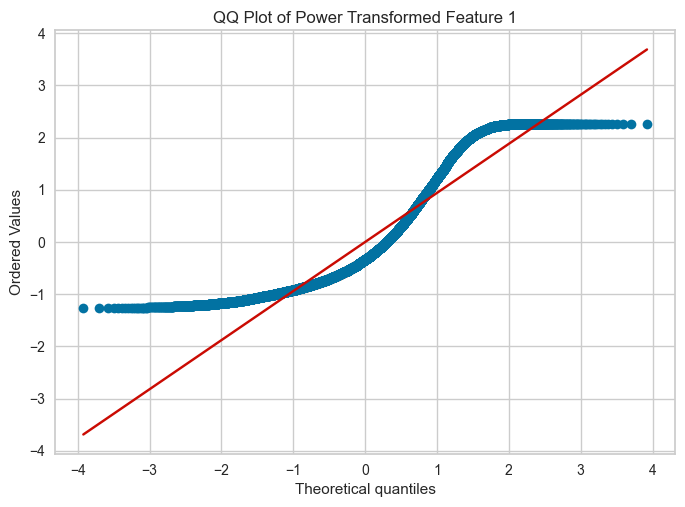

In [15]:
# Power Transformation
pt = PowerTransformer()
X_PowerTransformed = pt.fit_transform(scaled_X)

# # QQ Plot - Power Transformed Data
stats.probplot(X_PowerTransformed[:,0], dist="norm", plot=pylab)
plt.title('QQ Plot of Power Transformed Feature 1')
pylab.show()

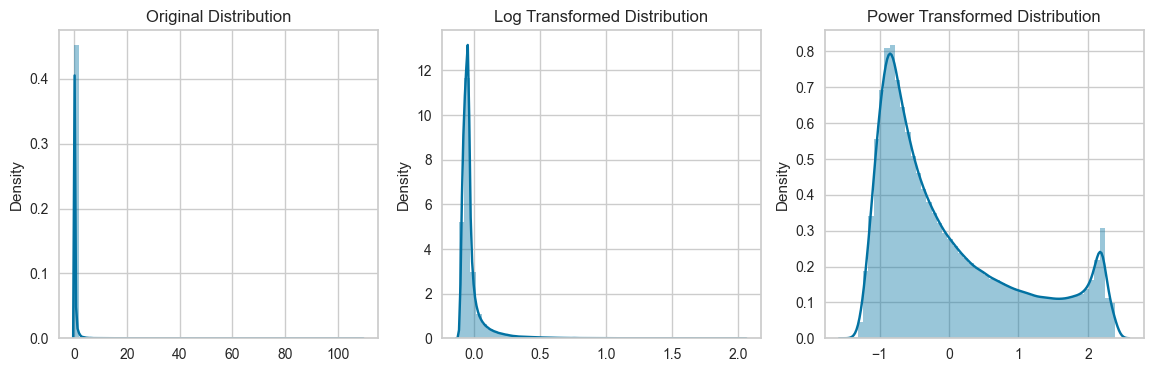

In [16]:
# Scaled Data KDE Plot
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.distplot(scaled_X)
plt.title('Original Distribution')

# Log Transformed Data KDE Plot
plt.subplot(132)
sns.distplot(X_LogTransformed)
plt.title('Log Transformed Distribution')

# Power Transformed Data KDE Plot
plt.subplot(133)
sns.distplot(X_PowerTransformed)
_ = plt.title('Power Transformed Distribution')

**As per the visualization, though there are not much difference between Log and Power Transform, we choose Log Transformation as the Data transformation method.**

### K-Means Clustering

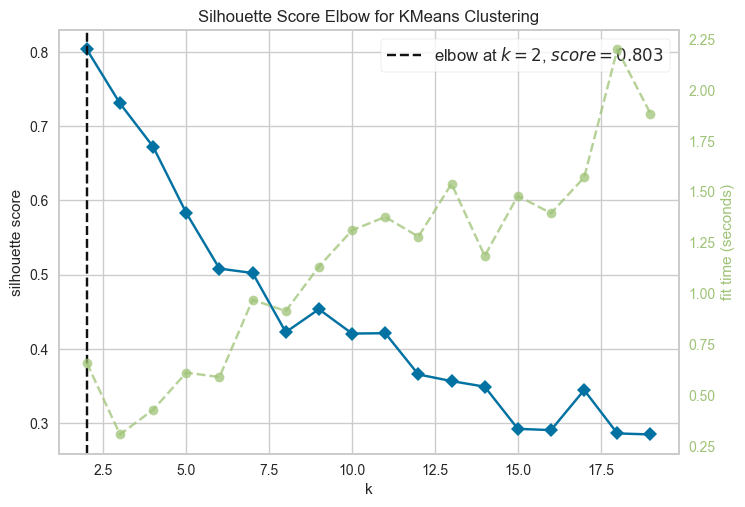

In [17]:
# Elbow Method
X = X_LogTransformed.to_numpy()
km = KMeans()
visualizer = KElbowVisualizer(km, k = (2,20), locate_elbow=True, metric = 'silhouette')
visualizer.fit(X)
_ = visualizer.poof()

In [18]:
# Function for Plotting Clusters
def plot_clusters(no_cluster, cluster_pred_values):
    for x in range(no_cluster):
        clustername = "cluster " + str(x)
        plt.scatter(
            X[cluster_pred_values == x, 0], X[cluster_pred_values == x, 1],
            s=50, c=np.random.rand(3,),
            edgecolor='black',
            label= clustername)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

# Function for Plotting Centroid (K-Means)
def plot_centroids(km_model):
    plt.scatter(
    km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1],
    s=150, marker='o',
    c='red', edgecolor='black',
    label='centroids')

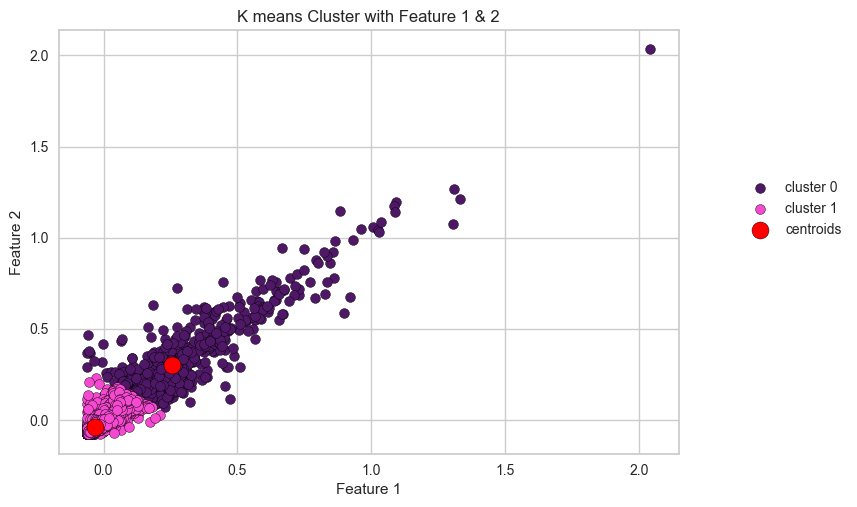

In [19]:
# KMeans - 2 Cluster
km = KMeans(n_clusters=2, init='random',
           n_init=10, max_iter=300,
            tol=1e-04, random_state=0)

km_predict = km.fit_predict(X[:,0:2])

#segregating cluster 1,2 data
cluster_1_data = X[km_predict == 0]
cluster_2_data = X[km_predict == 1]

# plot graph
plot_clusters(2, km_predict)
plot_centroids(km)
plt.legend(scatterpoints=1,loc = (1.1,0.5))
plt.title('K means Cluster with Feature 1 & 2')
plt.show()

In [20]:
# Silhouette Scoring
print('Silhouette Score for K-Means Clustering: {}'.format(silhouette_score(X, km.labels_, metric = 'euclidean')))

Silhouette Score for K-Means Clustering: 0.7968353142073703


In [23]:
cluster_1_data = pd.DataFrame(cluster_1_data)

In [24]:
cluster_2_data = pd.DataFrame(cluster_2_data)

In [28]:
X_LogTransformed 

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.115916,0.094280,-0.074530,0.144895,0.040215,0.154123,0.138219,0.140805,0.103108,0.004602,...,0.105544,0.080644,0.050370,0.047299,0.109239,0.038663,0.156816,0.116061,0.075334,0.147707
1,-0.041271,-0.048999,-0.063047,-0.049749,-0.062758,-0.045496,-0.070140,-0.070990,-0.064727,-0.054728,...,0.006090,0.002326,0.012110,-0.002666,0.005331,0.007137,-0.000453,-0.007153,-0.010865,-0.000662
2,-0.056604,-0.055494,-0.053527,-0.077859,-0.033452,-0.038673,-0.023716,-0.070749,-0.097183,-0.040013,...,-0.044526,-0.038597,-0.047533,-0.050201,-0.051012,-0.051626,-0.052359,-0.053821,-0.042331,-0.043804
3,0.232555,0.356832,0.193471,0.003569,0.241241,0.298901,0.324587,0.249299,0.355521,0.427761,...,0.921610,0.544978,0.348580,0.326695,0.328520,0.352958,0.360295,0.353815,0.382942,0.279342
4,-0.037843,-0.042634,-0.044078,-0.049941,-0.054385,-0.062633,-0.072395,-0.053383,-0.060893,-0.045298,...,-0.032729,-0.033636,-0.034815,-0.039517,-0.043625,-0.045741,-0.050313,-0.057861,-0.052230,-0.045709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,-0.031314,-0.052713,-0.030964,-0.043194,-0.034205,-0.046156,-0.042830,-0.030250,-0.009951,-0.015437,...,-0.050684,-0.055280,-0.052711,-0.044509,-0.047271,-0.050730,-0.060074,-0.064653,-0.052570,-0.049194
15786,-0.013818,-0.019433,-0.009298,0.025683,-0.031109,-0.037705,-0.010478,-0.043704,0.068487,0.059886,...,-0.031073,-0.033834,-0.034828,-0.030076,-0.033634,-0.024516,-0.037747,-0.039955,-0.036884,-0.031801
15787,-0.051641,-0.065960,-0.059631,-0.031571,-0.029176,-0.056920,-0.052697,-0.048950,-0.032660,-0.070694,...,-0.036459,-0.057326,-0.051027,-0.050451,-0.052340,-0.054161,-0.063898,-0.063959,-0.056718,-0.052793
15788,-0.042486,-0.033458,-0.030841,-0.025100,-0.027929,-0.044189,-0.053235,-0.022593,-0.031144,-0.034319,...,-0.031227,-0.019121,-0.017218,-0.019458,-0.022257,-0.026516,-0.035407,-0.003360,-0.012637,-0.014710


In [44]:
for i in range(0,14890):
    if(cluster_2_data.iloc[i,0] == X_LogTransformed.iloc[i,0]):
        print(i)

0
1
2
2666
9136
12381
12532


In [45]:
cluster_feature_stats = []
for cluster_id in range(2):
    cluster_data = X[km_predict == cluster_id]
    feature_means = np.mean(cluster_data, axis=0)
    feature_medians = np.median(cluster_data, axis=0)
    feature_stddevs = np.std(cluster_data, axis=0)
    cluster_feature_stats.append((feature_means, feature_medians, feature_stddevs))

In [47]:
cluster_sizes = np.bincount(km_predict)
print(cluster_sizes)

[  900 14890]


In [46]:
cluster_feature_stats

[(array([0.25605817, 0.30144704, 0.281454  , 0.28976437, 0.30317974,
         0.31436322, 0.31352784, 0.3245699 , 0.31512738, 0.29742834,
         0.30005121, 0.29836924, 0.29308867, 0.31716472, 0.29488543,
         0.30009508, 0.33985811, 0.34072051, 0.32979736, 0.33398093,
         0.33133544, 0.34101627, 0.33865103, 0.31542365, 0.31931128,
         0.32355172, 0.31755431, 0.24946047, 0.26119437, 0.26054474,
         0.22293938, 0.18249358, 0.22089147, 0.17790726, 0.19112516,
         0.18472747, 0.18444676, 0.17518947, 0.17685261, 0.17225499,
         0.17548943, 0.18111765, 0.19435936, 0.20537187, 0.2428719 ,
         0.2523258 , 0.2582231 , 0.27178683, 0.28637456, 0.28422557,
         0.26850768, 0.26050866]),
  array([0.19680723, 0.23470894, 0.2221343 , 0.23539174, 0.2387048 ,
         0.25474614, 0.2575762 , 0.27149198, 0.25765119, 0.2462205 ,
         0.2458437 , 0.24109179, 0.23723306, 0.25617381, 0.24333248,
         0.23517133, 0.28492562, 0.29204548, 0.27357467, 0.28058166,

In [40]:
cluster_2_data

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.115916,0.094280,-0.074530,0.144895,0.040215,0.154123,0.138219,0.140805,0.103108,0.004602,...,0.105544,0.080644,0.050370,0.047299,0.109239,0.038663,0.156816,0.116061,0.075334,0.147707
1,-0.041271,-0.048999,-0.063047,-0.049749,-0.062758,-0.045496,-0.070140,-0.070990,-0.064727,-0.054728,...,0.006090,0.002326,0.012110,-0.002666,0.005331,0.007137,-0.000453,-0.007153,-0.010865,-0.000662
2,-0.056604,-0.055494,-0.053527,-0.077859,-0.033452,-0.038673,-0.023716,-0.070749,-0.097183,-0.040013,...,-0.044526,-0.038597,-0.047533,-0.050201,-0.051012,-0.051626,-0.052359,-0.053821,-0.042331,-0.043804
3,-0.037843,-0.042634,-0.044078,-0.049941,-0.054385,-0.062633,-0.072395,-0.053383,-0.060893,-0.045298,...,-0.032729,-0.033636,-0.034815,-0.039517,-0.043625,-0.045741,-0.050313,-0.057861,-0.052230,-0.045709
4,0.046399,0.116302,0.065024,0.054044,0.058410,0.068733,0.053628,0.037118,0.016722,0.001094,...,0.061291,0.016475,0.036686,0.052419,0.057174,0.066879,0.076341,0.082925,0.073594,0.083418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14885,-0.031314,-0.052713,-0.030964,-0.043194,-0.034205,-0.046156,-0.042830,-0.030250,-0.009951,-0.015437,...,-0.050684,-0.055280,-0.052711,-0.044509,-0.047271,-0.050730,-0.060074,-0.064653,-0.052570,-0.049194
14886,-0.013818,-0.019433,-0.009298,0.025683,-0.031109,-0.037705,-0.010478,-0.043704,0.068487,0.059886,...,-0.031073,-0.033834,-0.034828,-0.030076,-0.033634,-0.024516,-0.037747,-0.039955,-0.036884,-0.031801
14887,-0.051641,-0.065960,-0.059631,-0.031571,-0.029176,-0.056920,-0.052697,-0.048950,-0.032660,-0.070694,...,-0.036459,-0.057326,-0.051027,-0.050451,-0.052340,-0.054161,-0.063898,-0.063959,-0.056718,-0.052793
14888,-0.042486,-0.033458,-0.030841,-0.025100,-0.027929,-0.044189,-0.053235,-0.022593,-0.031144,-0.034319,...,-0.031227,-0.019121,-0.017218,-0.019458,-0.022257,-0.026516,-0.035407,-0.003360,-0.012637,-0.014710


In [54]:
def time_series_plot(i,data):
    n = i
    plt.figure(figsize=(18, 9))
    dataframe = pd.DataFrame({'x_values': data.columns[:-2],
                          'y_values': [data.iloc[n,i] for i in data.columns[:-2]]})
    plt.plot(dataframe.x_values, dataframe.y_values)
    txt = "Line Plot for search term : "+ str(data.iloc[n,-1])
    plt.title(txt)
    plt.xlabel("Weeks from (1-52)")
    plt.ylabel("Search Term Frequency for each week")
    plt.show()

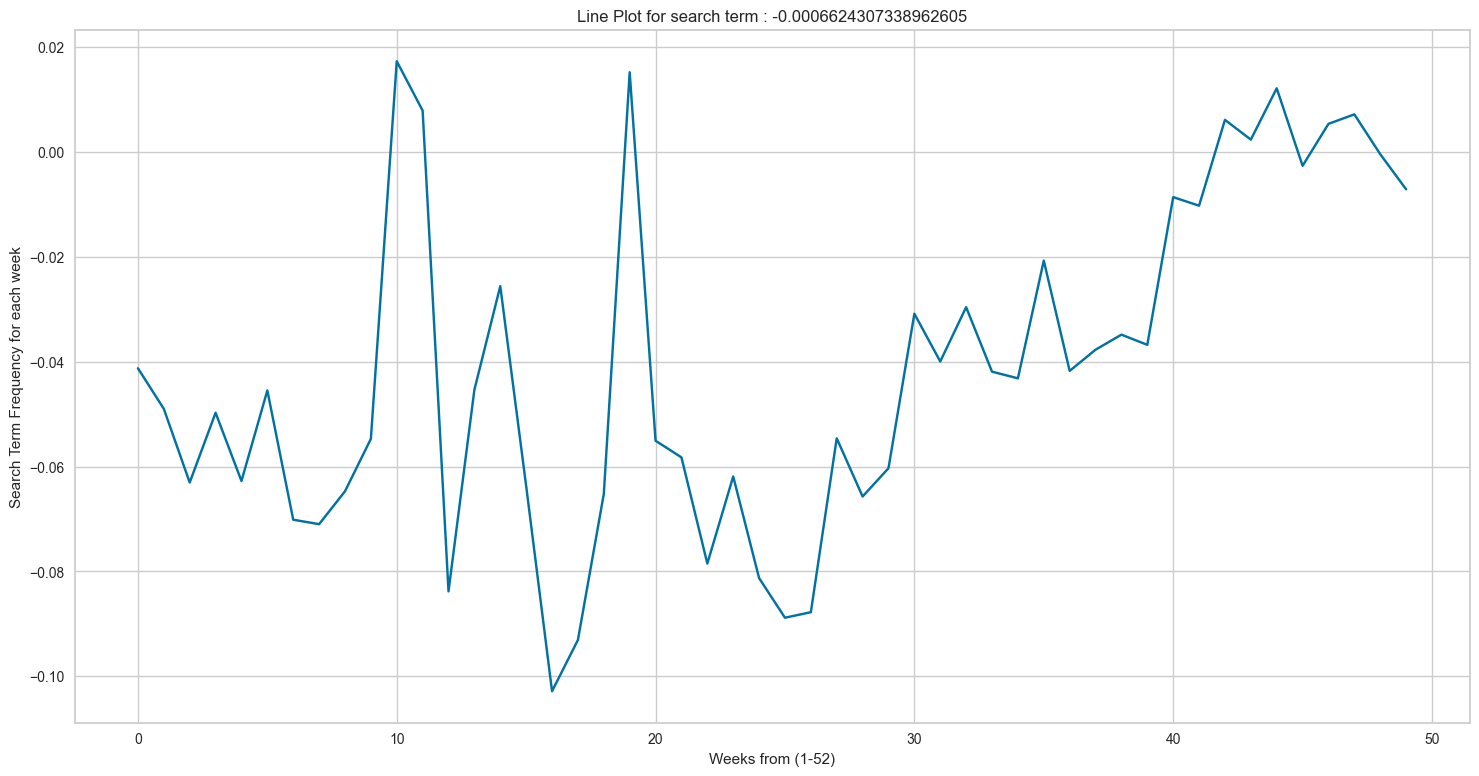

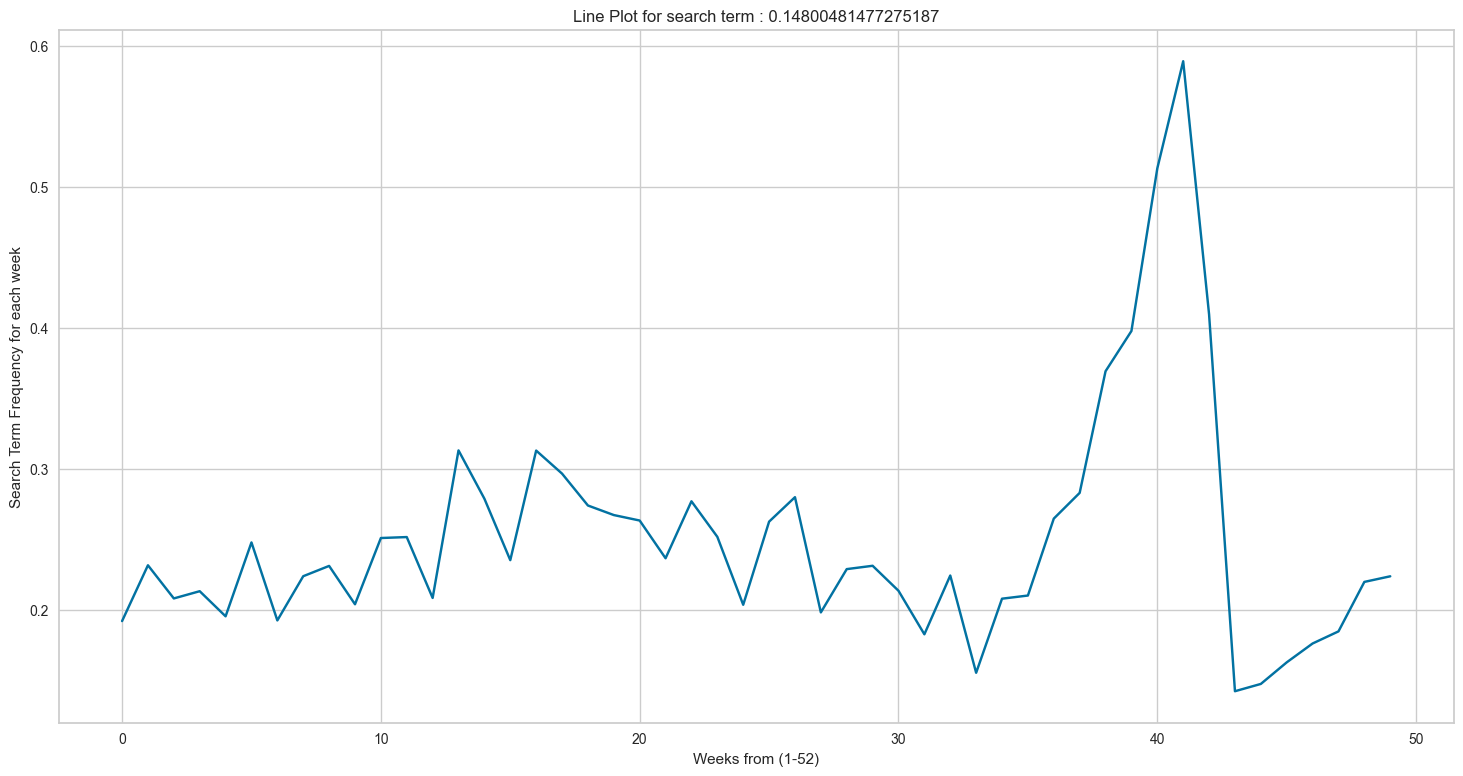

In [65]:
#plot graphs between any 2 samples in a same cluster
# time_series_plot(100,cluster_2_data)
# time_series_plot(50,cluster_2_data)
# time_series_plot(20,cluster_2_data)
# time_series_plot(100,cluster_1_data)
# time_series_plot(50,cluster_1_data)
# time_series_plot(20,cluster_1_data)
time_series_plot(1,cluster_2_data)
time_series_plot(1,cluster_1_data)

#########cluster 0 is showing high search frequencies conpared to cluster 1#############
##########################  maybe cluster 0 can be emerging and cluster 1 is declining####################

### JNB Clustering

In [19]:
# Downloading Fast Jenks breaks for Python
!pip install jenkspy


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------- 179.3/179.3 kB 52.0 kB/s eta 0:00:00


In [20]:
from jenkspy import JenksNaturalBreaks
jnb = JenksNaturalBreaks()

# Checking Max Silhoutte Scoring for determining the Feature
sh_list = []

for i in range(X.shape[1]):
    jnb.fit(X[:,i])
    sh_score = silhouette_score(X,jnb.labels_, metric = 'euclidean')
    sh_list.append(sh_score)

jnb_criterion = sh_list.index(max(sh_list))
jnb.fit(X[:,jnb_criterion])

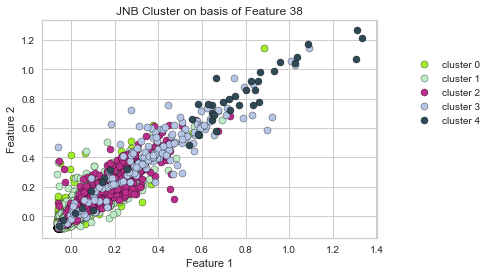

In [21]:
# JNB Plotting
plot_clusters(5, jnb.labels_)
plt.legend(scatterpoints=1,loc = (1.1,0.5))
plt.title('JNB Cluster on basis of Feature {}'.format(jnb_criterion + 1))
plt.show()

In [22]:
# Silhouette Scoring
print('Silhouette Score for Feature {crit} JNB Clustering: {val}'.format(crit = jnb_criterion, val = silhouette_score(X, jnb.labels_ , metric = 'euclidean')))

Silhouette Score for Feature 37 JNB Clustering: 0.5908472347920012
